In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matts\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matts\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matts\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification 
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [8]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
df = pd.read_csv('bbc_text_cls.csv')


In [9]:
df.head()


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [10]:
inputs = df['text']
labels = df['labels']


#It can be observed that the dataset has an evenly distribution of the labels which is convenient to train better the model, since

<Axes: >

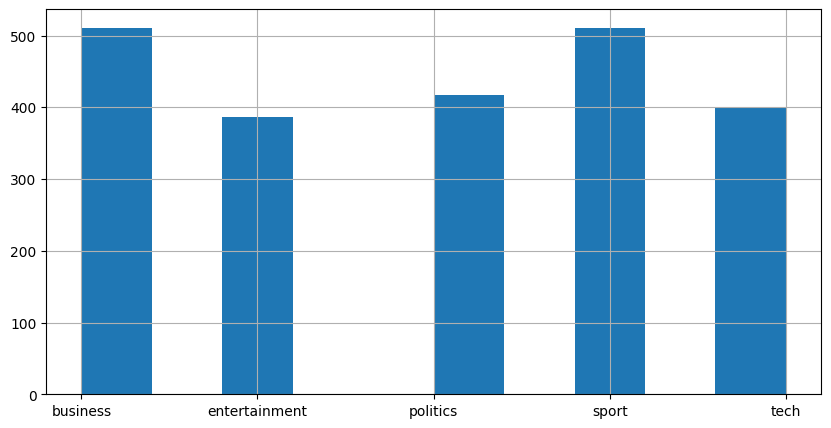

In [15]:
import matplotlib
labels.hist(figsize=(10, 5))


In [16]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split( inputs, labels, random_state=123)

In [17]:
vectorizer = CountVectorizer()

In [21]:
Xtrain = vectorizer.fit_transform(inputs_train) 

The Xtrain was transformed to a SparseMatrix with CountVectorizer 

Remember we need to convert the text data into numerical through CountVectorizer to fit the model

In [22]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [19]:
Xtest = vectorizer.transform(inputs_test)

This the amount of values in the matrix that are not zero.

In [23]:
(Xtrain != 0).sum()

337411

In [24]:
# what percentage of values are non-zero? 
#Literally represents non zero values divided by all the values (prod)
(Xtrain != 0).sum() / np.prod (Xtrain.shape)

#Only 0.7% of values are non-zero

0.007695239935415004

Fitting the model: Naive Bayes model

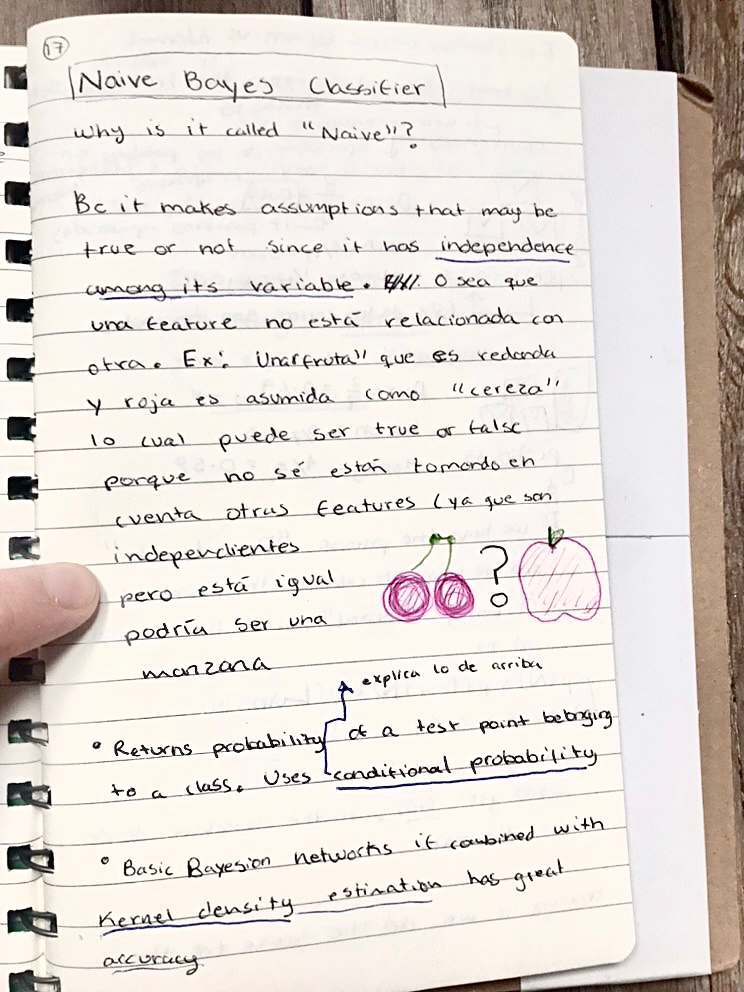

- Bayes theorem 

Allows you to prove or discard your hypothesis as you you get new data, adjusting your model to this new data 

Example: how likely does the model explain the probability of A with the new evidence of B

- Naives Bayes Classifier
    - Supervisado
    - NLP
    - Clasificación de texto
    - Spam o no spam

Es un modelo que se usa para clasificar clases con probabilidad (generalmente condicional: true or false pertenece a spam), la ventaja es que al entrenar el modelo, cada variable de los datos de entrada es independiente, por eso es “ingenuo” porque no considera ni busca interdependencia entre los datos. Igualmente el modelo para clasificar se basa manera independiente en la ocurrencia o densidad de los datos de de entrada como se ve en el ejemplo de abajo. Si para una palabra, como “Querido” se encontró con una frecuencia de 0.8 en los correos de Spam, esta se va a procesar con esa frecuencia si se quiere determinar que un correo es spam o no es spam

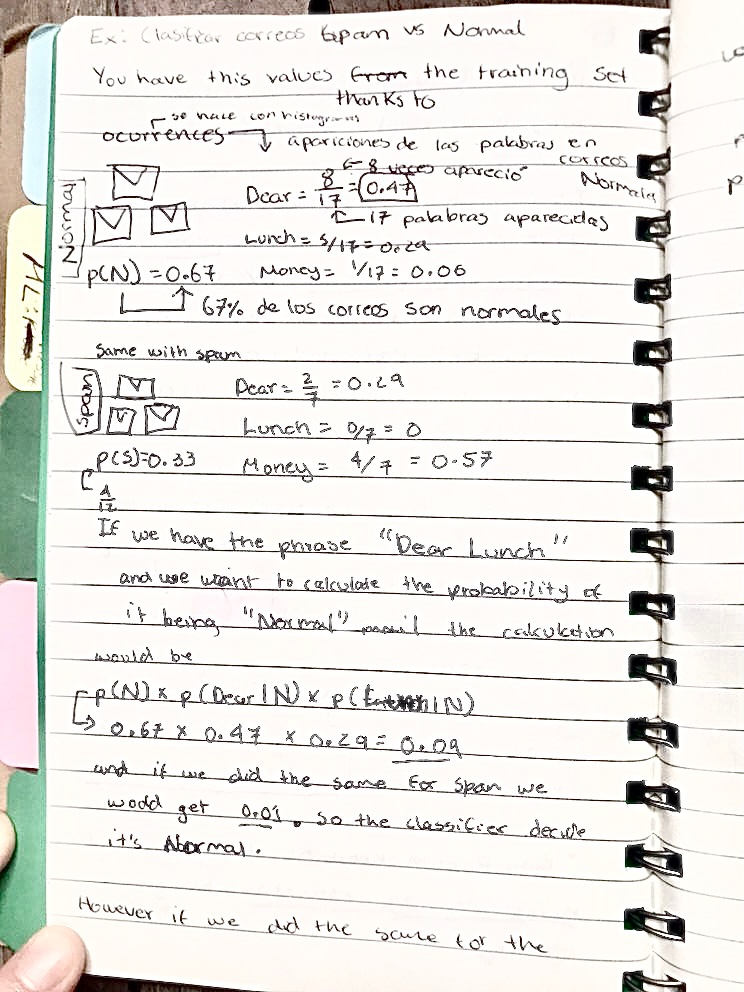
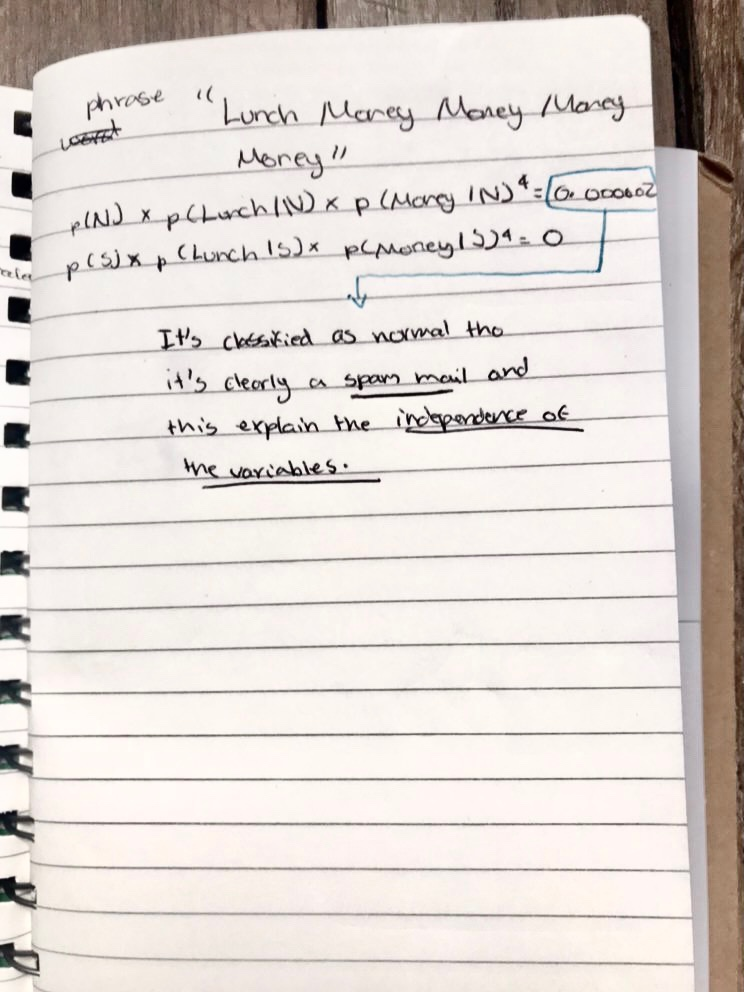
